### Evaluation Project - 9
### Customer Churn Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib .pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading train dataset
df_cust= pd.read_csv('Telecom_customer_churn.csv')

In [3]:
#dispalying 1st 5 records
df_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df_cust.shape

(7043, 21)

#### There are 7043 records and 21 features .

In [5]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df_cust.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**Categorical Features :** 
    ['customerID', 'gender',  'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod',  'TotalCharges', 'Churn']
    
**Continuous Features :**    ['SeniorCitizen', 'tenure','MonthlyCharges',]

### Checking null values :

In [7]:
df_cust.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### There are Zero (0) Null values .

In [8]:
## Since 'customerID ' is not deciding factor for churn analysis so will drop it.
df_cust.drop('customerID' , axis=1 , inplace=True)
df_cust.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Handling categorical data

**1)Nominal encoding :**  
will use one hot encoding
**2)Ordinal encoding :**  will use Label Encoding

In [9]:
df_cust['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

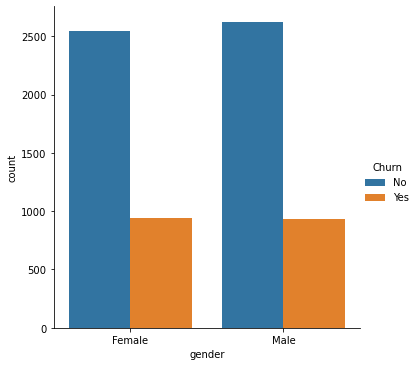

In [10]:
sns.catplot(x='gender' ,data=df_cust ,hue='Churn', kind='count')

#### from above statistics we can see both Male and Female has same churn rate .

#### 'gender' nominal data : will perform One hot encoding

In [11]:
df_cust=pd.get_dummies(df_cust , columns=['gender'], drop_first=True)
df_cust.head()


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Male
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,1
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0


#### Female --> 0
#### Male ---> 1

In [12]:
df_cust['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

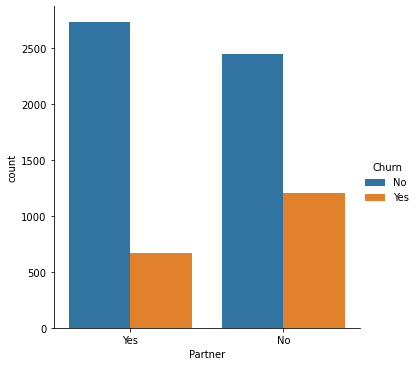

In [13]:
sns.catplot(x='Partner' ,data=df_cust ,hue='Churn', kind='count')

#### We can observe from the graph that churning rate is quite high for customers having partners .

In [14]:
df_cust = pd.get_dummies(df_cust , columns=['Partner'] ,drop_first=True)
df_cust.head()

,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes
0,0,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,1
1,0,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,1,0
2,0,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0
3,0,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,0
4,0,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,0


In [15]:
df_cust.groupby('Churn')['Dependents'].value_counts()

Churn  Dependents
No     No            3390
       Yes           1784
Yes    No            1543
       Yes            326
Name: Dependents, dtype: int64

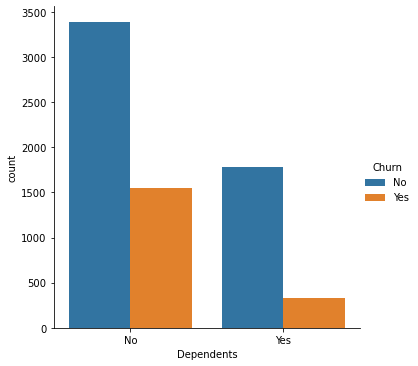

In [16]:
sns.catplot(x='Dependents' ,data=df_cust ,hue='Churn', kind='count')

####  Churning rate for Independents is quite high 52.62% and that for Dependents is 21% .

In [17]:
df_cust = pd.get_dummies(df_cust , columns=['Dependents'] ,drop_first=True)
df_cust.head()

,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes
0,0,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,1,0
1,0,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,1,0,0
2,0,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0,0
3,0,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,0,0
4,0,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,0,0


In [18]:
df_cust.groupby('Churn')['PhoneService'].value_counts()

Churn  PhoneService
No     Yes             4662
       No               512
Yes    Yes             1699
       No               170
Name: PhoneService, dtype: int64

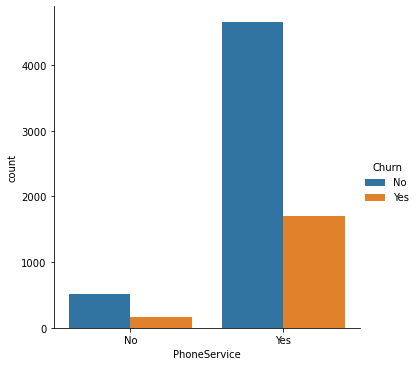

In [19]:
sns.catplot(x='PhoneService' ,data=df_cust ,hue='Churn', kind='count')

#### We can observe from the graph that churning rate is quite high for customers having partners .

In [20]:
df_cust = pd.get_dummies(df_cust , columns=['PhoneService'] ,drop_first=True)
df_cust.head()

,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes
0,0,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,1,0,0
1,0,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,1,0,0,1
2,0,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0,0,1
3,0,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,0,0,0
4,0,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,0,0,1


In [21]:
df_cust.groupby('Churn')['MultipleLines'].value_counts()

Churn  MultipleLines   
No     No                  2541
       Yes                 2121
       No phone service     512
Yes    Yes                  850
       No                   849
       No phone service     170
Name: MultipleLines, dtype: int64

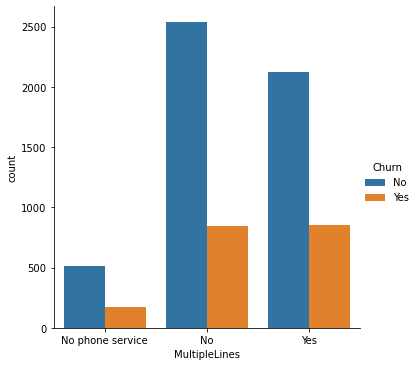

In [22]:
sns.catplot(x='MultipleLines' ,data=df_cust ,hue='Churn', kind='count')

#### Customers with Multiplelines has heighest churning rate  .

In [23]:
df_cust = pd.get_dummies(df_cust , columns=['MultipleLines'] ,drop_first=True)
df_cust.head()

,SeniorCitizen,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes
0,0,1,DSL,No,Yes,No,No,No,No,Month-to-month,...,Electronic check,29.85,29.85,No,0,1,0,0,1,0
1,0,34,DSL,Yes,No,Yes,No,No,No,One year,...,Mailed check,56.95,1889.5,No,1,0,0,1,0,0
2,0,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,...,Mailed check,53.85,108.15,Yes,1,0,0,1,0,0
3,0,45,DSL,Yes,No,Yes,Yes,No,No,One year,...,Bank transfer (automatic),42.30,1840.75,No,1,0,0,0,1,0
4,0,2,Fiber optic,No,No,No,No,No,No,Month-to-month,...,Electronic check,70.70,151.65,Yes,0,0,0,1,0,0


In [24]:
df_cust.groupby('Churn')['InternetService'].value_counts()

Churn  InternetService
No     DSL                1962
       Fiber optic        1799
       No                 1413
Yes    Fiber optic        1297
       DSL                 459
       No                  113
Name: InternetService, dtype: int64

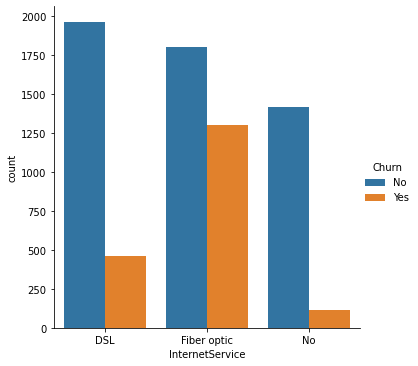

In [25]:
sns.catplot(x='InternetService' ,data=df_cust ,hue='Churn', kind='count')

#### Customer with fiber optic InternetService has 66% Churning rate and customer with no internate service has lowest churn rate .

In [26]:
df_cust = pd.get_dummies(df_cust , columns=['InternetService'] ,drop_first=True)
df_cust.head()

,SeniorCitizen,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,...,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No
0,0,1,No,Yes,No,No,No,No,Month-to-month,Yes,...,29.85,No,0,1,0,0,1,0,0,0
1,0,34,Yes,No,Yes,No,No,No,One year,No,...,1889.5,No,1,0,0,1,0,0,0,0
2,0,2,Yes,Yes,No,No,No,No,Month-to-month,Yes,...,108.15,Yes,1,0,0,1,0,0,0,0
3,0,45,Yes,No,Yes,Yes,No,No,One year,No,...,1840.75,No,1,0,0,0,1,0,0,0
4,0,2,No,No,No,No,No,No,Month-to-month,Yes,...,151.65,Yes,0,0,0,1,0,0,1,0


In [27]:
df_cust.groupby('Churn')['OnlineSecurity'].value_counts()

Churn  OnlineSecurity     
No     No                     2037
       Yes                    1724
       No internet service    1413
Yes    No                     1461
       Yes                     295
       No internet service     113
Name: OnlineSecurity, dtype: int64

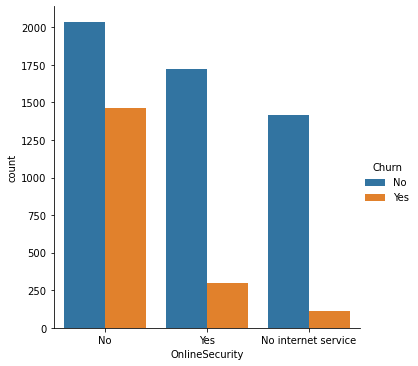

In [28]:
sns.catplot(x='OnlineSecurity' ,data=df_cust ,hue='Churn', kind='count')

#### We can observe from the graph that churning rate is quite high for customers who doesn't have online security it is almost 42% .

In [29]:
df_cust = pd.get_dummies(df_cust , columns=['OnlineSecurity'] ,drop_first=True)
df_cust.head()

,SeniorCitizen,tenure,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,...,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes
0,0,1,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,...,0,1,0,0,1,0,0,0,0,0
1,0,34,No,Yes,No,No,No,One year,No,Mailed check,...,1,0,0,1,0,0,0,0,0,1
2,0,2,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,...,1,0,0,1,0,0,0,0,0,1
3,0,45,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),...,1,0,0,0,1,0,0,0,0,1
4,0,2,No,No,No,No,No,Month-to-month,Yes,Electronic check,...,0,0,0,1,0,0,1,0,0,0


In [30]:
df_cust.groupby('Churn')['OnlineBackup'].value_counts()

Churn  OnlineBackup       
No     Yes                    1906
       No                     1855
       No internet service    1413
Yes    No                     1233
       Yes                     523
       No internet service     113
Name: OnlineBackup, dtype: int64

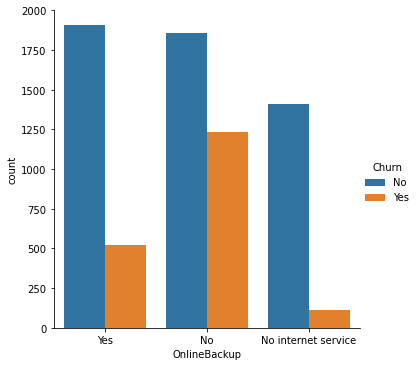

In [31]:
sns.catplot(x='OnlineBackup' ,data=df_cust ,hue='Churn', kind='count')

#### We can observe from the graph that churning rate is quite high for customers having No OnlineBackup  it is 40%.

In [32]:

df_cust = pd.get_dummies(df_cust , columns=['OnlineBackup'] ,drop_first=True)
df_cust.head()

,SeniorCitizen,tenure,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,...,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes
0,0,1,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,...,0,0,1,0,0,0,0,0,0,1
1,0,34,Yes,No,No,No,One year,No,Mailed check,56.95,...,0,1,0,0,0,0,0,1,0,0
2,0,2,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,...,0,1,0,0,0,0,0,1,0,1
3,0,45,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,...,0,0,1,0,0,0,0,1,0,0
4,0,2,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,...,0,1,0,0,1,0,0,0,0,0


In [33]:
df_cust.groupby('Churn')['DeviceProtection'].value_counts()

Churn  DeviceProtection   
No     No                     1884
       Yes                    1877
       No internet service    1413
Yes    No                     1211
       Yes                     545
       No internet service     113
Name: DeviceProtection, dtype: int64

#### We can observe from the graph that churning rate is quite high for customers having No DeviceProtection  it is 37 %.

In [34]:
df_cust = pd.get_dummies(df_cust , columns=['DeviceProtection'] ,drop_first=True)
df_cust.head()

,SeniorCitizen,tenure,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,...,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes
0,0,1,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,...,1,0,0,0,0,0,0,1,0,0
1,0,34,No,No,No,One year,No,Mailed check,56.95,1889.5,...,0,0,0,0,0,1,0,0,0,1
2,0,2,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,...,0,0,0,0,0,1,0,1,0,0
3,0,45,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,...,1,0,0,0,0,1,0,0,0,1
4,0,2,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,...,0,0,1,0,0,0,0,0,0,0


#### We can observe from the graph that churning rate is quite high for customers having partners .

In [35]:
df_cust.groupby('Churn')['TechSupport'].value_counts()

Churn  TechSupport        
No     No                     2027
       Yes                    1734
       No internet service    1413
Yes    No                     1446
       Yes                     310
       No internet service     113
Name: TechSupport, dtype: int64

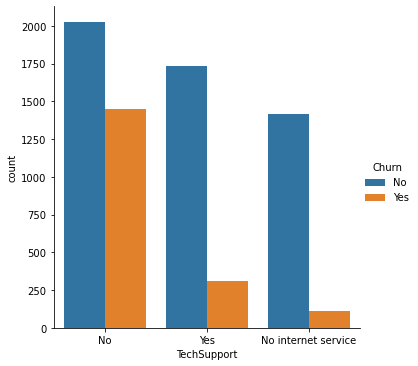

In [36]:
sns.catplot(x='TechSupport' ,data=df_cust ,hue='Churn', kind='count')

#### We can observe from the graph that churning rate is quite high for customers having No TechSupport almost 42% and Lowest for  No internet service (7%).

In [37]:
df_cust = pd.get_dummies(df_cust , columns=['TechSupport'] ,drop_first=True)
df_cust.head()

,SeniorCitizen,tenure,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,...,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes
0,0,1,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,...,0,0,0,0,0,1,0,0,0,0
1,0,34,No,No,One year,No,Mailed check,56.95,1889.5,No,...,0,0,0,1,0,0,0,1,0,0
2,0,2,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,...,0,0,0,1,0,1,0,0,0,0
3,0,45,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,...,0,0,0,1,0,0,0,1,0,1
4,0,2,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,...,1,0,0,0,0,0,0,0,0,0


In [38]:
df_cust.groupby('Churn')['StreamingTV'].value_counts()

Churn  StreamingTV        
No     Yes                    1893
       No                     1868
       No internet service    1413
Yes    No                      942
       Yes                     814
       No internet service     113
Name: StreamingTV, dtype: int64

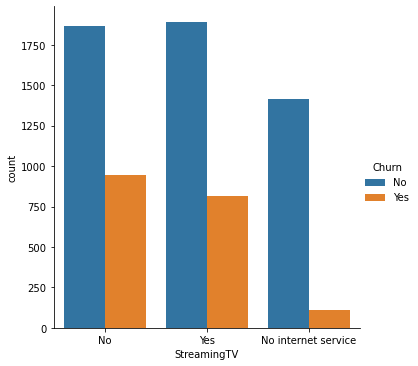

In [39]:

sns.catplot(x='StreamingTV' ,data=df_cust ,hue='Churn', kind='count')

#### We can observe from the graph that churning rate is quite high for customers having No StreamingTV almost 33.5% and Lowest for  No internet service (7%).

In [40]:
df_cust = pd.get_dummies(df_cust , columns=['StreamingTV'] ,drop_first=True)
df_cust.head()

,SeniorCitizen,tenure,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Male,...,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes
0,0,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,...,0,0,0,1,0,0,0,0,0,0
1,0,34,No,One year,No,Mailed check,56.95,1889.5,No,1,...,0,1,0,0,0,1,0,0,0,0
2,0,2,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,...,0,1,0,1,0,0,0,0,0,0
3,0,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,...,0,1,0,0,0,1,0,1,0,0
4,0,2,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,...,0,0,0,0,0,0,0,0,0,0


Churn  StreamingMovies    
No     Yes                    1914
       No                     1847
       No internet service    1413
Yes    No                      938
       Yes                     818
       No internet service     113
Name: StreamingMovies, dtype: int64


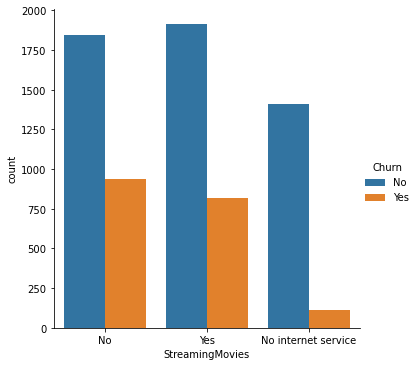

In [41]:
print(df_cust.groupby('Churn')['StreamingMovies'].value_counts())
sns.catplot(x='StreamingMovies' ,data=df_cust ,hue='Churn', kind='count')

#### We can observe from the graph that churning rate is quite high for customers having No StreamingMovies almost 33.6% and Lowest for  No internet service (7%).

In [42]:
df_cust = pd.get_dummies(df_cust , columns=['StreamingMovies'] ,drop_first=True)
df_cust.head()

,SeniorCitizen,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,1,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,1,...,0,1,0,0,0,0,0,0,0,0
1,0,34,One year,No,Mailed check,56.95,1889.5,No,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0,...,0,1,0,0,0,0,0,0,0,0
3,0,45,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,0,...,0,0,0,1,0,1,0,0,0,0
4,0,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df_cust.groupby('Churn')['Contract'].value_counts()

Churn  Contract      
No     Month-to-month    2220
       Two year          1647
       One year          1307
Yes    Month-to-month    1655
       One year           166
       Two year            48
Name: Contract, dtype: int64

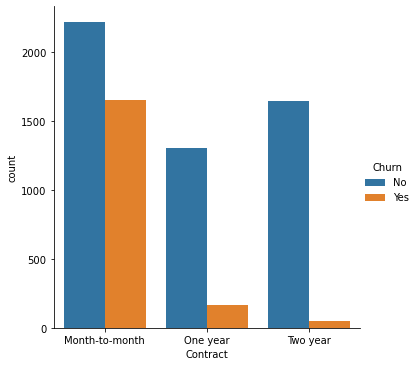

In [44]:

sns.catplot(x='Contract' ,data=df_cust ,hue='Churn', kind='count')

#### We can observe from the graph that churning rate is quite high for customers having Contract of Month-to-month is almost 42.7% and Lowest for  Two years contract (3%).

In [45]:
df_cust = pd.get_dummies(df_cust , columns=['Contract'] ,drop_first=True)
df_cust.head()

,SeniorCitizen,tenure,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,...,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year
0,0,1,Yes,Electronic check,29.85,29.85,No,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,No,Mailed check,56.95,1889.5,No,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,2,Yes,Mailed check,53.85,108.15,Yes,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,45,No,Bank transfer (automatic),42.30,1840.75,No,1,0,0,...,0,1,0,1,0,0,0,0,1,0
4,0,2,Yes,Electronic check,70.70,151.65,Yes,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df_cust.groupby('Churn')['PaperlessBilling'].value_counts()

Churn  PaperlessBilling
No     Yes                 2771
       No                  2403
Yes    Yes                 1400
       No                   469
Name: PaperlessBilling, dtype: int64

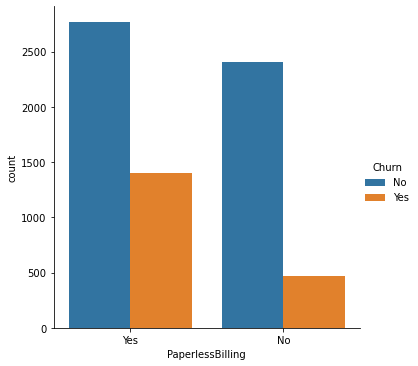

In [47]:

sns.catplot(x='PaperlessBilling' ,data=df_cust ,hue='Churn', kind='count')

#### We can observe from the graph that churning rate is quite high for customers having  PaperlessBilling almost 33.5% and Lowest for  Paper Billing (16%).

In [48]:
df_cust = pd.get_dummies(df_cust , columns=['PaperlessBilling'] ,drop_first=True)
df_cust.head()

,SeniorCitizen,tenure,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes
0,0,1,Electronic check,29.85,29.85,No,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,34,Mailed check,56.95,1889.5,No,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,0,2,Mailed check,53.85,108.15,Yes,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,45,Bank transfer (automatic),42.30,1840.75,No,1,0,0,0,...,1,0,1,0,0,0,0,1,0,0
4,0,2,Electronic check,70.70,151.65,Yes,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [49]:
df_cust.groupby('Churn')['PaymentMethod'].value_counts()

Churn  PaymentMethod            
No     Mailed check                 1304
       Electronic check             1294
       Credit card (automatic)      1290
       Bank transfer (automatic)    1286
Yes    Electronic check             1071
       Mailed check                  308
       Bank transfer (automatic)     258
       Credit card (automatic)       232
Name: PaymentMethod, dtype: int64

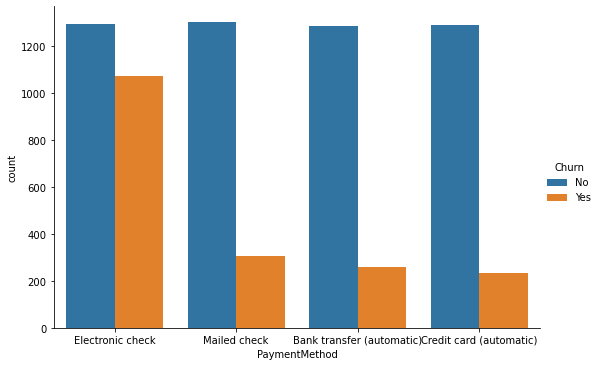

In [50]:

sns.catplot(x='PaymentMethod' ,data=df_cust ,hue='Churn', kind='count',height=5 ,aspect=1.5)


#### We can observe from the graph that churning rate is quite high for customers having PaymentMethod as Electronic check  almost 45% and Lowest for Payment Method as Credit card (automatic)(15%).

In [51]:
df_cust = pd.get_dummies(df_cust , columns=['PaymentMethod'] ,drop_first=True)
df_cust.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,No,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.5,No,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,Yes,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,No,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,Yes,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


### Checking Null '' values

In [52]:
#checking for '' empty records in TotalCharges
# giving indexes of blank records
print(np.where(df_cust['TotalCharges'].values== ''))

(array([], dtype=int64),)


In [53]:
# displaying empty records in TotalCharges
# df.iloc[index no.] displaying row records by index
df_cust.iloc[[ 488,  753,  936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
488,0,0,52.55,,No,0,1,1,0,1,...,0,1,0,0,0,1,1,0,0,0
753,0,0,20.25,,No,1,0,1,1,0,...,1,0,1,0,0,1,0,0,0,1
936,0,0,80.85,,No,0,1,1,1,0,...,0,1,0,1,0,1,0,0,0,1
1082,0,0,25.75,,No,1,1,1,1,0,...,1,0,1,0,0,1,0,0,0,1
1340,0,0,56.05,,No,0,1,1,0,1,...,0,1,0,0,0,1,0,1,0,0
3331,0,0,19.85,,No,1,1,1,1,0,...,1,0,1,0,0,1,0,0,0,1
3826,0,0,25.35,,No,1,1,1,1,0,...,1,0,1,0,0,1,0,0,0,1
4380,0,0,20.00,,No,0,1,1,1,0,...,1,0,1,0,0,1,0,0,0,1
5218,0,0,19.70,,No,1,1,1,1,0,...,1,0,1,0,1,0,1,0,0,1
6670,0,0,73.35,,No,0,1,1,1,0,...,0,1,0,0,0,1,0,0,0,1


 #### From above data we can conclude that since tenure =0 and Total chrges ='' we can say that these are ndew customers ,so no previous usage is there and that why Total Chrges and tenure has '' and 0 records respectively.So now will fill Total Charges with 0.

In [54]:
df_cust.iloc[[ 488,  753,  936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
488,0,0,52.55,,No,0,1,1,0,1,...,0,1,0,0,0,1,1,0,0,0
753,0,0,20.25,,No,1,0,1,1,0,...,1,0,1,0,0,1,0,0,0,1
936,0,0,80.85,,No,0,1,1,1,0,...,0,1,0,1,0,1,0,0,0,1
1082,0,0,25.75,,No,1,1,1,1,0,...,1,0,1,0,0,1,0,0,0,1
1340,0,0,56.05,,No,0,1,1,0,1,...,0,1,0,0,0,1,0,1,0,0
3331,0,0,19.85,,No,1,1,1,1,0,...,1,0,1,0,0,1,0,0,0,1
3826,0,0,25.35,,No,1,1,1,1,0,...,1,0,1,0,0,1,0,0,0,1
4380,0,0,20.00,,No,0,1,1,1,0,...,1,0,1,0,0,1,0,0,0,1
5218,0,0,19.70,,No,1,1,1,1,0,...,1,0,1,0,1,0,1,0,0,1
6670,0,0,73.35,,No,0,1,1,1,0,...,0,1,0,0,0,1,0,0,0,1


#### filling Null values 

In [55]:
index=[ 488,  753,  936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]
for i in index :
    df_cust.iloc[i,3]=0
df_cust.iloc[[ 488,  753,  936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
488,0,0,52.55,0,No,0,1,1,0,1,...,0,1,0,0,0,1,1,0,0,0
753,0,0,20.25,0,No,1,0,1,1,0,...,1,0,1,0,0,1,0,0,0,1
936,0,0,80.85,0,No,0,1,1,1,0,...,0,1,0,1,0,1,0,0,0,1
1082,0,0,25.75,0,No,1,1,1,1,0,...,1,0,1,0,0,1,0,0,0,1
1340,0,0,56.05,0,No,0,1,1,0,1,...,0,1,0,0,0,1,0,1,0,0
3331,0,0,19.85,0,No,1,1,1,1,0,...,1,0,1,0,0,1,0,0,0,1
3826,0,0,25.35,0,No,1,1,1,1,0,...,1,0,1,0,0,1,0,0,0,1
4380,0,0,20.00,0,No,0,1,1,1,0,...,1,0,1,0,0,1,0,0,0,1
5218,0,0,19.70,0,No,1,1,1,1,0,...,1,0,1,0,1,0,1,0,0,1
6670,0,0,73.35,0,No,0,1,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [56]:
# Changing datatype
df_cust['TotalCharges']=df_cust['TotalCharges'].astype(float)

In [57]:
# Checking datatype
df_cust['TotalCharges'].dtype


dtype('float64')

<AxesSubplot:xlabel='TotalCharges', ylabel='Churn'>

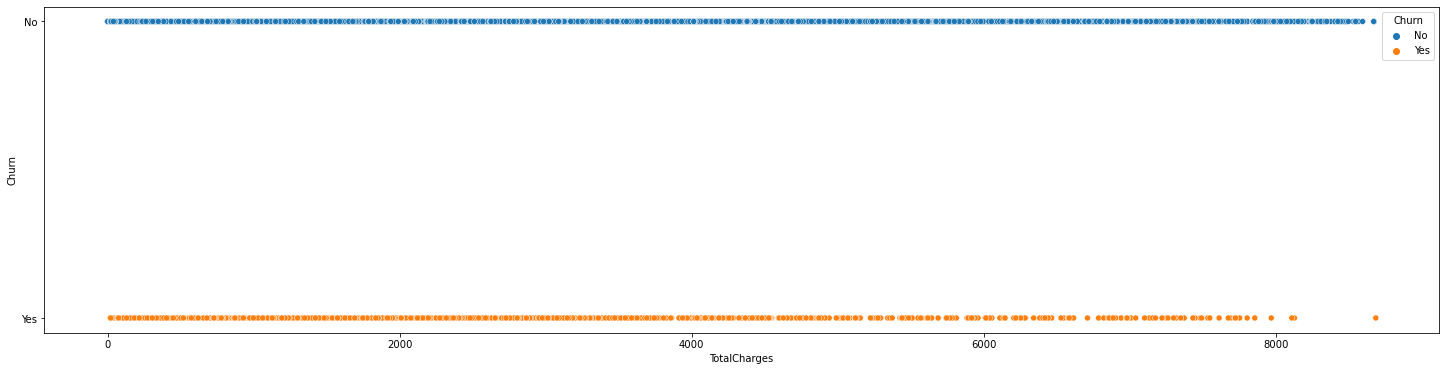

In [58]:
plt.figure(figsize=(25,6))
sns.scatterplot(x='TotalCharges' ,y='Churn' ,data=df_cust ,hue='Churn')

#### 'Total charges' > 8000 churn is less where as churn is high for less total charges . as total charges increases churn rate decreases it is inversally proportionate with churn rate .

In [59]:
np.where(df_cust['TotalCharges']>8000)

(array([ 193,  198,  369,  437,  464,  483,  526,  540,  551,  590,  608,
         746,  775,  850,  896, 1061, 1135, 1170, 1280, 1306, 1693, 1735,
        1746, 1767, 1875, 2025, 2115, 2187, 2267, 2368, 2450, 2537, 2559,
        2603, 2667, 2689, 2816, 2926, 3107, 3205, 3247, 3299, 3767, 3820,
        3878, 3890, 3897, 4026, 4155, 4170, 4206, 4229, 4263, 4553, 4562,
        4586, 4610, 4620, 4737, 4797, 4885, 5113, 5319, 5347, 5420, 5537,
        5558, 5742, 5819, 5916, 5995, 6118, 6135, 6306, 6403, 6566, 6728,
        6768], dtype=int64),)

In [60]:
# converting 'Yes'--> 1 and 'No'--> 0
df_cust['Churn']=df_cust['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

In [61]:
df_cust['Churn']=df_cust['Churn'].astype(int)
df_cust.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [62]:
df_cust.shape

(7043, 31)

### Finding Correlation :

In [63]:
round(df_cust.corr() ,2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.00,0.02,0.22,0.10,0.15,-0.00,0.02,-0.21,0.01,-0.01,...,-0.18,0.11,-0.18,0.12,-0.05,-0.12,0.16,-0.02,0.17,-0.15
tenure,0.02,1.00,0.25,0.83,-0.35,0.01,0.38,0.16,0.01,-0.01,...,-0.04,0.28,-0.04,0.29,0.20,0.56,0.01,0.23,-0.21,-0.23
MonthlyCharges,0.22,0.25,1.00,0.65,0.19,-0.01,0.10,-0.11,0.25,-0.25,...,-0.76,0.63,-0.76,0.63,0.00,-0.07,0.35,0.03,0.27,-0.38
TotalCharges,0.10,0.83,0.65,1.00,-0.20,-0.00,0.32,0.06,0.11,-0.11,...,-0.38,0.51,-0.38,0.52,0.17,0.35,0.16,0.18,-0.06,-0.30
Churn,0.15,-0.35,0.19,-0.20,1.00,-0.01,-0.15,-0.16,0.01,-0.01,...,-0.23,0.06,-0.23,0.06,-0.18,-0.30,0.19,-0.13,0.30,-0.09
gender_Male,-0.00,0.01,-0.01,-0.00,-0.01,1.00,-0.00,0.01,-0.01,0.01,...,0.01,-0.01,0.01,-0.01,0.01,-0.00,-0.01,0.00,0.00,0.01
Partner_Yes,0.02,0.38,0.10,0.32,-0.15,-0.00,1.00,0.45,0.02,-0.02,...,0.00,0.12,0.00,0.12,0.08,0.25,-0.01,0.08,-0.08,-0.10
Dependents_Yes,-0.21,0.16,-0.11,0.06,-0.16,0.01,0.45,1.00,-0.00,0.00,...,0.14,-0.02,0.14,-0.04,0.07,0.20,-0.11,0.06,-0.15,0.06
PhoneService_Yes,0.01,0.01,0.25,0.11,0.01,-0.01,0.02,-0.00,1.00,-1.00,...,0.17,-0.02,0.17,-0.03,-0.00,0.00,0.02,-0.01,0.00,-0.00
MultipleLines_No phone service,-0.01,-0.01,-0.25,-0.11,-0.01,0.01,-0.02,0.00,-1.00,1.00,...,-0.17,0.02,-0.17,0.03,0.00,-0.00,-0.02,0.01,-0.00,0.00


<AxesSubplot:>

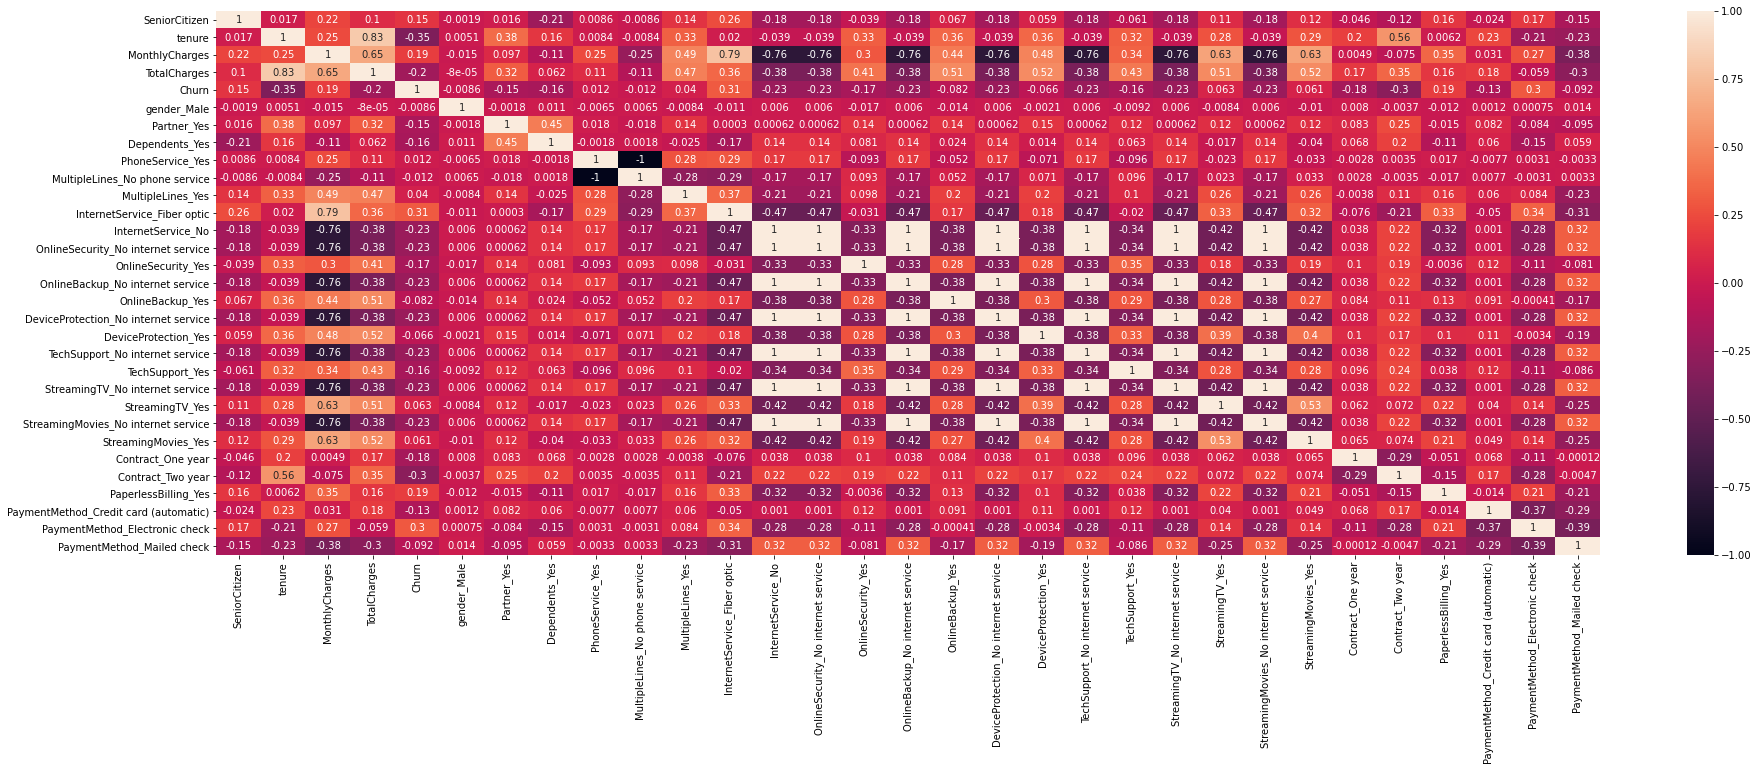

In [64]:
# using pearson correlation
plt.figure(figsize=(31,10))
cor=(df_cust.corr())
sns.heatmap(cor ,annot=True )

#### Checking Collinearity of target variable with other independent variables

In [65]:
df_cust.corr()['Churn'].sort_values(ascending=False)

Churn                                    1.000000
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
PaperlessBilling_Yes                     0.191825
SeniorCitizen                            0.150889
StreamingTV_Yes                          0.063228
StreamingMovies_Yes                      0.061382
MultipleLines_Yes                        0.040102
PhoneService_Yes                         0.011942
gender_Male                             -0.008612
MultipleLines_No phone service          -0.011942
DeviceProtection_Yes                    -0.066160
OnlineBackup_Yes                        -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner_Yes                             -0.150448
Dependents_Yes                          -0.164221
TechSupport_Yes                         -0.164674
OnlineSecurity_Yes                      -0.171226


**-vely correlated features with tagret (Churn) :**
[InternetService_Fiber optic,PaymentMethod_Electronic check, MonthlyCharges ,
,PaperlessBilling_Yes ,SeniorCitizen ,StreamingTV_Yes ,StreamingMovies_Yes,MultipleLines_Yes,PhoneService_Yes]

**-vely correlated features with tagret (Churn) :**
[gender_Male ,MultipleLines_No phone service ,DeviceProtection_Yes ,OnlineBackup_Yes , PaymentMethod_Mailed check ,            
PaymentMethod_Credit card (automatic),Partner_Yes , Dependents_Yes , TechSupport_Yes,OnlineSecurity_Yes , Contract_One year                       
,TotalCharges ,DeviceProtection_No internet service ,OnlineSecurity_No internet service , TechSupport_No internet service         
StreamingTV_No internet service, InternetService_No ,StreamingMovies_No internet service, OnlineBackup_No internet service        
Contract_Two year , tenure ]

Text(0.5, 1.0, 'Correlation with target')

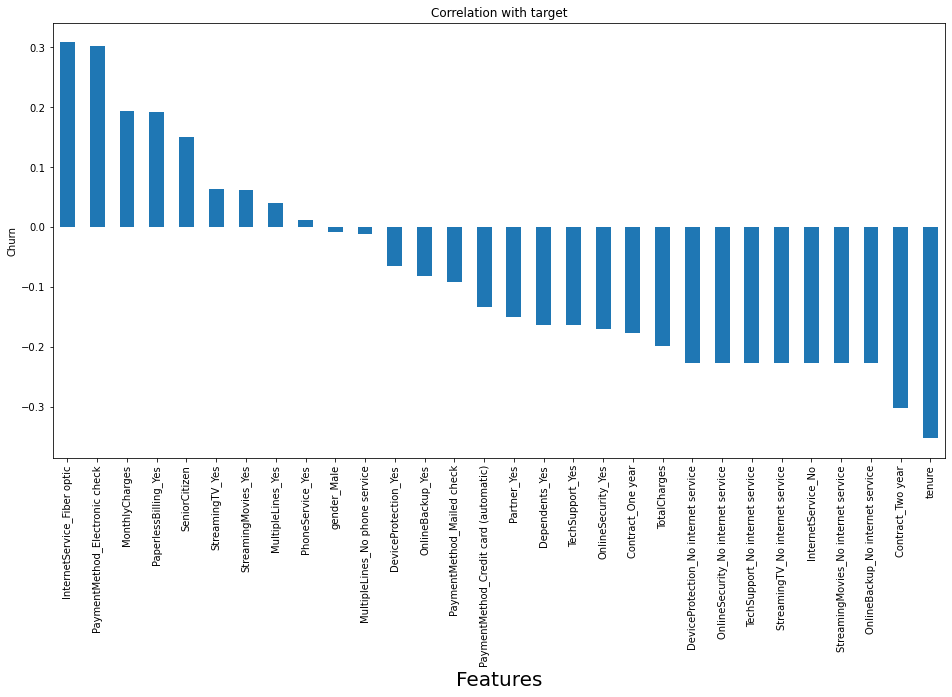

In [66]:
plt.figure(figsize=(16,8))
df_cust.corr()['Churn'].sort_values(ascending=False).drop('Churn').plot(kind='bar')
plt.xlabel('Features',fontsize=20)
plt.ylabel('Churn')
plt.title('Correlation with target')

#### Splitting Data  for Training the module 

In [67]:
x=df_cust.drop('Churn',axis=1)
y=df_cust['Churn']

In [68]:
x.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [69]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

### Model 1 Random Forest

In [70]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split ,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings 
warnings.filterwarnings('ignore')
lr=LogisticRegression()

**Will find out best random_state value**

In [71]:
max_accu = 0
max_randst = 0
for i in range (0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=i)
    lr.fit(x_train,y_train)
    
    pred_lr=lr.predict(x_test)
    accu_score= accuracy_score(y_test,pred_lr)
    if max_accu<accu_score:
        max_accu= accu_score
        max_randst= i
print("max accuracy score is :", round(max_accu*100 ,1),"at random state :",max_randst)

max accuracy score is : 82.9 at random state : 771


### Data Scaling using standard scaler

In [72]:
from sklearn.preprocessing import StandardScaler
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=771)

from sklearn.preprocessing import StandardScaler

# fit scaler on training data
sc = StandardScaler().fit(x_train)

# transform training data
x_train_sc = sc.transform(x_train)

# transform testing dataabs
x_test_sc = sc.transform(x_test)

### Model Creation

In [73]:
lr=LogisticRegression() #Logistic Regression
knn=KNeighborsClassifier() #KNearest Neibour 
dt=DecisionTreeClassifier() # Deciesion Tree
rf=RandomForestClassifier() # Random Forest
adb=AdaBoostClassifier()    # Adaboost Classifier 
svc=SVC()              # support vactor classifier        
gdboost=GradientBoostingClassifier() #Gradient Boosting Classifier 
xgboost=XGBClassifier()  #Xtrim Gredient Boosting Classifier 
model=[lr,knn,dt,rf,adb,svc,gdboost,xgboost]
print("Model is created")
model_name=['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier',
           'AdaBoostClassifier','SVC' ,'GradientBoostingClassifier','XGBClassifier']

Model is created


####  Train out the models.

In [74]:
Model_report = pd.DataFrame(columns=['Model_name','Accuracy_Score','Confusion_matrix'])

In [75]:
j=0
for i in model:
    i.fit(x_train_sc, y_train)
    modelname=model_name[j]
    pred =i.predict(x_test_sc)
    accu=round(accuracy_score(y_test,pred)*100 ,2)
    confu_mat=confusion_matrix(y_test,pred)
    class_report = classification_report(y_test,pred)
    print(f"{i} Accuracy score is :",round(accuracy_score(y_test,pred)*100 ,2),'\n')
    print(f"{i} confusion_matrix is :",confusion_matrix(y_test,pred),'\n')
    print(f"{i} classification_report is :\n" ,classification_report(y_test,pred),'\n\n')
    print("_______________________________________________________________________\n")
    Model_report=Model_report.append({
                                   'Model_name':modelname,
                                   'Accuracy_Score':accu,
                                   'Confusion_matrix':confu_mat
                                   },ignore_index=True)
    j=j+1

LogisticRegression() Accuracy score is : 83.04 

LogisticRegression() confusion_matrix is : [[969  93]
 [146 201]] 

LogisticRegression() classification_report is :
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      1062
           1       0.68      0.58      0.63       347

    accuracy                           0.83      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.83      0.83      1409
 


_______________________________________________________________________

KNeighborsClassifier() Accuracy score is : 77.93 

KNeighborsClassifier() confusion_matrix is : [[918 144]
 [167 180]] 

KNeighborsClassifier() classification_report is :
               precision    recall  f1-score   support

           0       0.85      0.86      0.86      1062
           1       0.56      0.52      0.54       347

    accuracy                           0.78      1409
   macro avg       0.70      0.69      0.

In [76]:
Model_report

,Model_name,Accuracy_Score,Confusion_matrix
0,LogisticRegression,83.04,"[[969, 93], [146, 201]]"
1,KNeighborsClassifier,77.93,"[[918, 144], [167, 180]]"
2,DecisionTreeClassifier,73.10,"[[860, 202], [177, 170]]"
3,RandomForestClassifier,81.41,"[[971, 91], [171, 176]]"
4,AdaBoostClassifier,82.61,"[[973, 89], [156, 191]]"
5,SVC,82.04,"[[981, 81], [172, 175]]"
6,GradientBoostingClassifier,81.69,"[[970, 92], [166, 181]]"
7,XGBClassifier,79.70,"[[941, 121], [165, 182]]"


#### Considering Accuracy_score ,confusion score ,recall and f1 Score Logistic Regression is performing well in all aspect ,so will choose it

### Hyperparameter tunning 

In [78]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:


clf= GridSearchCV(lr ,param_grid=param_grid ,cv=3,verbose=2 ,n_jobs=-1)
clf.fit(x_train_sc, y_train)
clf.best_estimator_

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


LogisticRegression(C=0.03359818286283781, penalty='l1', solver='saga')

In [82]:
### prediction with best parameter for classification
y_test_pred=clf.best_estimator_.predict(x_test_sc) 
# best score 
accuracy_score(y_test,y_test_pred)
print(confusion_matrix(y_test,y_test_pred))
print(accuracy_score(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

[[970  92]
 [155 192]]
0.8246983676366217
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1062
           1       0.68      0.55      0.61       347

    accuracy                           0.82      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.82      0.82      0.82      1409



### AUC ROC Curve

Text(0.5, 1.0, 'ROC AUC PLOT')

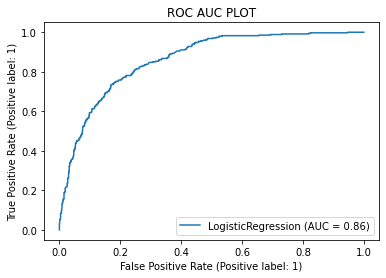

In [83]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(clf.best_estimator_,x_test_sc , y_test)

plt.title("ROC AUC PLOT")

#### Accuracy_score is 82.5% and AUC is 86% which is quite good .

In [85]:
import joblib
joblib.dump(clf.best_estimator_ ,"Customer_Churn_Analysis.pkl")

['Customer_Churn_Analysis.pkl']